In [159]:
import qiskit as q
from math import sqrt
from numpy import arccos
from qiskit.execute_function import execute
from qiskit.visualization import plot_histogram

In [160]:
def prepare_register(n):
    quantum = q.QuantumRegister(n)
    classical = q.ClassicalRegister(n)
    register = q.QuantumCircuit(quantum, classical)
    register.x(0)
    
    count = n
    for i in range(0, n - 1):
        angle = 2.0* arccos(1.0 / sqrt(count))
        register.cry(angle, i, i + 1)
        register.cx(i + 1, i)
        count -= 1
    
    return register

In [165]:
register = prepare_register(7)
register.measure_all()
register.draw()

┌───┐              ┌───┐                                      »
q286_0: ┤ X ├──────■───────┤ X ├──────────────────────────────────────»
        └───┘┌─────┴──────┐└─┬─┘              ┌───┐                   »
q286_1: ─────┤ Ry(2.3664) ├──■────────■───────┤ X ├───────────────────»
             └────────────┘     ┌─────┴──────┐└─┬─┘              ┌───┐»
q286_2: ────────────────────────┤ Ry(2.3005) ├──■────────■───────┤ X ├»
                                └────────────┘     ┌─────┴──────┐└─┬─┘»
q286_3: ───────────────────────────────────────────┤ Ry(2.2143) ├──■──»
                                                   └────────────┘     »
q286_4: ──────────────────────────────────────────────────────────────»
                                                                      »
q286_5: ──────────────────────────────────────────────────────────────»
                                                                      »
q286_6: ──────────────────────────────────────────────────────────────»
                                                                      »
 c26: 7/══════════════════════════════════════════════════════════════»
                                                                      »
meas: 7/══════════════════════════════════════════════════════════════»
                                                                      »
«                                                             ░ ┌─┐            »
«q286_0: ─────────────────────────────────────────────────────░─┤M├────────────»
«                                                             ░ └╥┘┌─┐         »
«q286_1: ─────────────────────────────────────────────────────░──╫─┤M├─────────»
«                                                             ░  ║ └╥┘┌─┐      »
«q286_2: ─────────────────────────────────────────────────────░──╫──╫─┤M├──────»
«                    ┌───┐                                    ░  ║  ║ └╥┘┌─┐   »
«q286_3: ─────■──────┤ X ├────────────────────────────────────░──╫──╫──╫─┤M├───»
«        ┌────┴─────┐└─┬─┘              ┌───┐                 ░  ║  ║  ║ └╥┘┌─┐»
«q286_4: ┤ Ry(2π/3) ├──■────────■───────┤ X ├─────────────────░──╫──╫──╫──╫─┤M├»
«        └──────────┘     ┌─────┴──────┐└─┬─┘           ┌───┐ ░  ║  ║  ║  ║ └╥┘»
«q286_5: ─────────────────┤ Ry(1.9106) ├──■───────■─────┤ X ├─░──╫──╫──╫──╫──╫─»
«                         └────────────┘     ┌────┴────┐└─┬─┘ ░  ║  ║  ║  ║  ║ »
«q286_6: ────────────────────────────────────┤ Ry(π/2) ├──■───░──╫──╫──╫──╫──╫─»
«                                            └─────────┘      ░  ║  ║  ║  ║  ║ »
« c26: 7/════════════════════════════════════════════════════════╬══╬══╬══╬══╬═»
«                                                                ║  ║  ║  ║  ║ »
«meas: 7/════════════════════════════════════════════════════════╩══╩══╩══╩══╩═»
«                                                                0  1  2  3  4 »
«              
«q286_0: ──────
«              
«q286_1: ──────
«              
«q286_2: ──────
«              
«q286_3: ──────
«              
«q286_4: ──────
«        ┌─┐   
«q286_5: ┤M├───
«        └╥┘┌─┐
«q286_6: ─╫─┤M├
«         ║ └╥┘
« c26: 7/═╬══╬═
«         ║  ║ 
«meas: 7/═╩══╩═
«         5  6

In [166]:
backend = q.BasicAer.get_backend('qasm_simulator')
job = execute(register, backend, shots=1)
result = job.result()

{'0000001 0000000': 144, '0001000 0000000': 142, '0000100 0000000': 141, '0010000 0000000': 134, '1000000 0000000': 141, '0100000 0000000': 143, '0000010 0000000': 155}
<class 'qiskit.result.counts.Counts'>


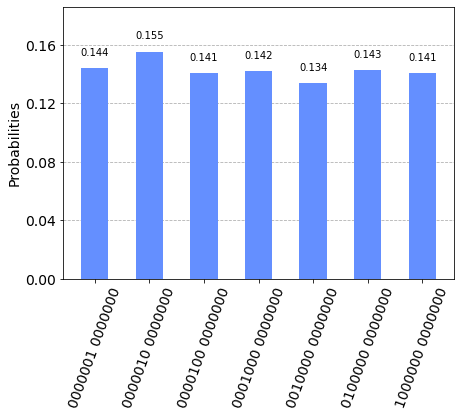

In [167]:
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [164]:
string = counts.keys()
bitstring = ""
for i in string:
    bitstring = i

def get_num(bitstring):
    for i in range(len(bitstring)):
        if bitstring[i] == "1":
            return i + 1

print(f"Random Number: {get_num(bitstring)}")

Random Number: 4
